# Q4 Time series forecasting of Nvidia 

### Why Nvidia? A brief analysis of Nvidia stock

Nvidia is currently one of the biggest players in the technology, being widely recognised for its powerful graphic processing units (GPUs) which have seen use in gaming, editing, data centres and artificial intelligence (AI). In the last few years Nvidia has seen a massive increase in its success due to the standard of the chips that they produce and their use for AI. The common prediction that AI is going to “take over” has resulted in an uptake of Nvidia products as many complex components of AI are built around their chips (Kim, 2024). Nvidia’s influence in the tech world has come from their ability to constantly innovate and create new products. It is this rise in popularity that has led to its selection for this time series forecasting. 

#### What factors influence Nvidia stock?

Factors that may influence Nvidias stock price include low interest rates which have led to a rise in Nvidias stock price in recent years. This has also led to an increase in investing and spending. Additionally, the increased demand for cryptocurrencies has boosted the demand for Nvidias GPUs which positively contributes to the company’s stock price (Vallarino, 2024). Another factor that could potentially influence their stock price is the actions of competitors such as AMD and Intel who also produce chips that are sought after. This competition is what drives Nvidia to innovate and create new and higher performing chips. 

#### Obtainable variables and unobtainable variables

##### Obtainable: 
•	Historical stock prices which can be found from free API (up to 2018)

•	Financial statements and earning reports which are publicly released. 

•	News and data on product launches and other significant events related to the company.

•	Historic Market Sentiment - In 2018 NVIDIA stock would have been influenced by three main factors. Firstly the decline in cryptocurrency prices led to a reduced demand for GPUs for mining, which poorly impacted Nvidia's revenues and by extension its stock performance. Secondly, the company continued to experience strong growth in the gaming sector, helped by the increasing demand and supply of games with high-quality graphics. Finally, NVIDIA's involvement in cutting-edge technologies such as deep learning, and autonomous vehicles caused investors to be optimistic about the company's future growth. These aspects collectively shaped NVIDIA's stock sentiment throughout the year, leading to fluctuations in its market performance.


##### Difficult to obtain and quantify: 
•	Some data is behind an API paywall making it hard to access. 

•	Market sentiment – If the API was up-to-date it would be hard to quantify market sentiment which will influence Nvidia, it is possible to get an idea of this with access to the correct data and information but using free methods this will most likely be out-of-date. 

•	Competitive actions – information on what competitors are doing will be delayed making it a variable that cannot be obtained. 

•	Data after a 2018 may be difficult to obtain due to API restrictions (Quandl)



#### Import libraries and set up API key 

In [1]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


#set up the Quandl API key
quandl.ApiConfig.api_key = 'TPxQbvwJuKJsULN5s-sD'


#### Grab data from Quandl API

In [2]:
#extract Nvidia stock data
nvidia_data = quandl.get('WIKI/NVDA')

#display the first few rows of the data to check that it is working
print(nvidia_data.head())

             Open   High    Low  Close     Volume  Ex-Dividend  Split Ratio  \
Date                                                                          
1999-01-22  21.00  23.44  18.63  19.69  5655600.0          0.0          1.0   
1999-01-25  21.25  22.00  19.69  21.75  1063500.0          0.0          1.0   
1999-01-26  22.00  22.44  19.75  20.06   715000.0          0.0          1.0   
1999-01-27  20.13  20.63  19.00  20.00   509100.0          0.0          1.0   
1999-01-28  20.00  20.13  19.81  19.94   474000.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
1999-01-22   1.623824   1.812497  1.440564    1.522529   67867200.0  
1999-01-25   1.643156   1.701149  1.522529    1.681818   12762000.0  
1999-01-26   1.701149   1.735172  1.527168    1.551139    8580000.0  
1999-01-27   1.556552   1.595214  1.469174    1.546499    6109200.0  
1999-01-28   1.546499   1.

#### Inspect data

In [3]:
#check for missing values
print(nvidia_data.isnull().sum())

Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64


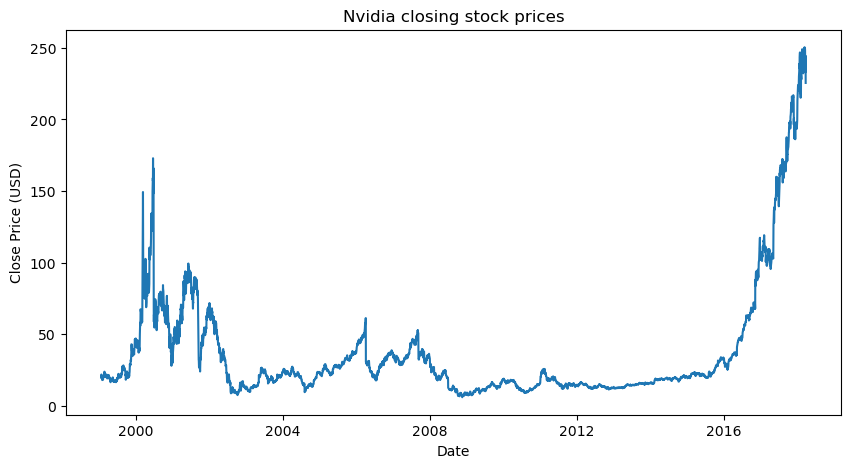

In [5]:
#extract the Nvidia stock close prices 
nvidia_closeprice = nvidia_data[['Close']]

#plot the closing prices
plt.figure(figsize=(10,5))
plt.plot(nvidia_closeprice)
plt.title('Nvidia closing stock prices')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()

#### Deeper inspection of the data with analysis

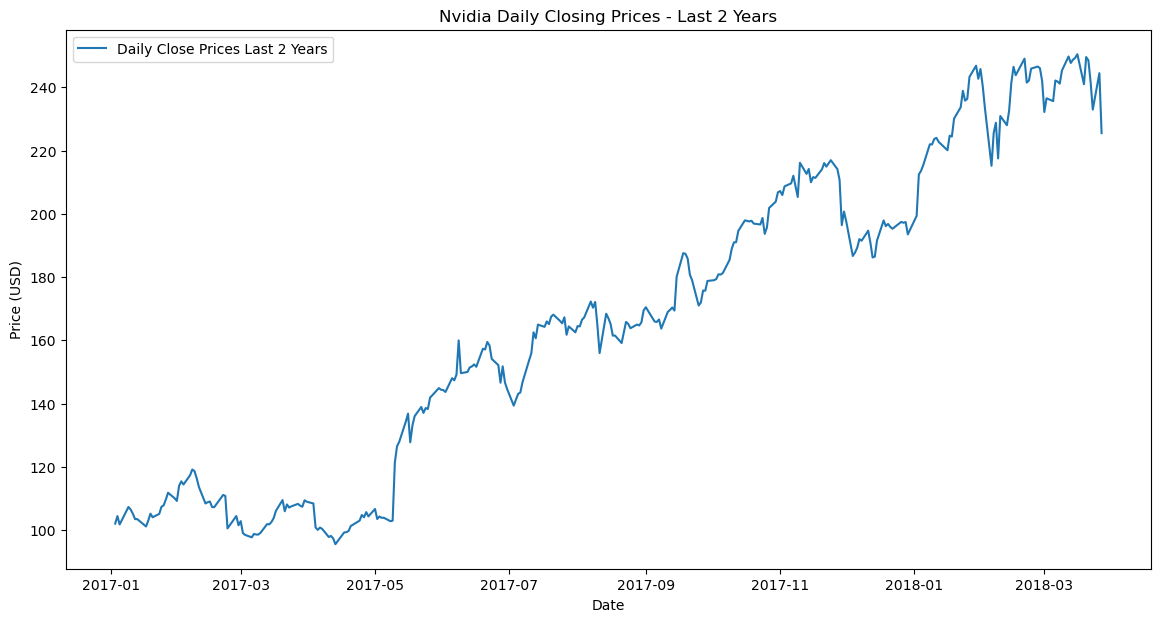

In [6]:
#Detailed data analysis to understand the data's time-dependent structure

#plot the closing prices with a highlight on recent trends

plt.figure(figsize=(14, 7))
plt.plot(nvidia_closeprice['Close'].last('2Y'), label='Daily Close Prices Last 2 Years')  # Focusing on the last 2 years
plt.title('Nvidia Daily Closing Prices - Last 2 Years')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()




This graph shows Nvidia's daily closing prices between 2017 and 2018, highlighting the company's stock performance in a period that experienced significant technological advancements and market changes. A noticeable upward trend suggests strong market confidence, showing Nvidia's strategic product launches and consistent growth in the AI and gaming sectors. However, the fluctuations observed, particularly the sharp peaks and troughs, could be market reactions to a mix of earnings reports, investor sentiment, and broader economic events.

C:\Users\phili\AppData\Local\Temp\ipykernel_25960\2168723935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_closeprice['Year'] = nvidia_closeprice.index.year
C:\Users\phili\AppData\Local\Temp\ipykernel_25960\2168723935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_closeprice['Month'] = nvidia_closeprice.index.month


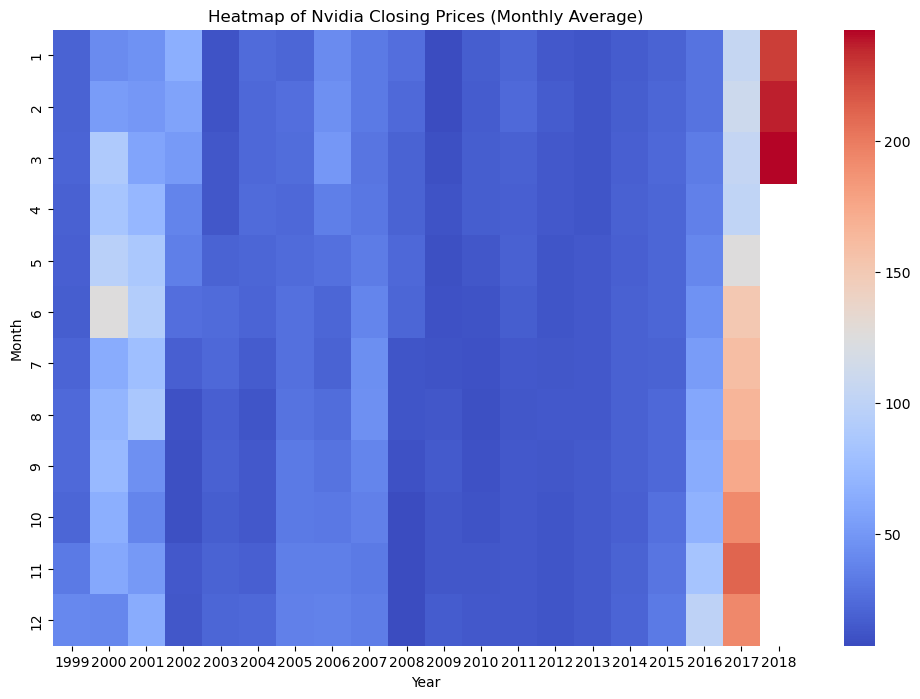

In [11]:
#heatmap of the year and month to show seasonal patterns
nvidia_closeprice['Year'] = nvidia_closeprice.index.year
nvidia_closeprice['Month'] = nvidia_closeprice.index.month
pivot_table = nvidia_closeprice.pivot_table(values='Close', index='Month', columns='Year', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=False, cmap='coolwarm')
plt.title('Heatmap of Nvidia Closing Prices (Monthly Average)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


This heatmap provides a visual representation of Nvidia's monthly average closing prices across different years. With the warmer colors indicate higher average prices, while cooler colors represent lower values. From this heatmap it is clear that there are notable peaks and dips that correspond with specific months, suggesting potential seasonality in stock price movements. The later years display a trend of increasing prices, which is in line with Nvidia's growth trajectory in the tech industry. This pattern is particularly pronounced in the recent years, which could be attributed to the company's successful product launches. 

#### Data preparation

In [12]:


#make a copy of the data 
nvidia_features = nvidia_data[['Close']].copy()

#add lagged features which are the stock prices from previous days
#shift() method is used to shift the index
nvidia_features['lag_1'] = nvidia_features['Close'].shift(1)
nvidia_features['lag_2'] = nvidia_features['Close'].shift(2)

#add a moving average feature for a 5-day time-frame
#the .rolling().mean() method calculates the moving average
nvidia_features['moving_average_5'] = nvidia_features['Close'].rolling(window=5).mean()

#drop rows with NaN values that were created as a result of lagging and rolling
nvidia_features.dropna(inplace=True)

# Just ensure to use 'nvidia_features' instead of 'nvidia_closeprice' when defining X
X = nvidia_features.drop('Close', axis=1)
y = nvidia_features['Close']


nvidia_features

,Close,lag_1,lag_2,moving_average_5
Date,,,,
1999-01-28,19.94,20.00,20.06,20.288
1999-01-29,19.00,19.94,20.00,20.150
1999-02-01,19.38,19.00,19.94,19.676
1999-02-02,17.88,19.38,19.00,19.240
1999-02-03,18.25,17.88,19.38,18.890
...,...,...,...,...
2018-03-21,248.56,249.58,241.00,247.792
2018-03-22,241.85,248.56,249.58,246.294
2018-03-23,232.97,241.85,248.56,242.792


#### Data Preprocessing for Model Training

In [13]:
#define the independent variables (features) and the dependent variable (target)
#drop the 'close' column as it's the target
X = nvidia_features.drop('Close', axis=1)
y = nvidia_features['Close']

#split the data into training and testing sets
#this is done so that we can validate the model on unseen data to make sure it doesnt overfit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training (80%) and testing (20%) sets.")

#scale the features using standardscaler
#feature scaling allows for many machine learning algorithms to be more efficient
scaler = StandardScaler()

#fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

#transform the test data based on the scaler fitted to the training data
print("Features scaled using standardscaler.")

#print the shape of the training and testing sets to confirm the split

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")


Data split into training (80%) and testing (20%) sets.
Features scaled using standardscaler.
Training set shape: (3856, 3)
Testing set shape: (965, 3)


In [14]:
#train a simple Linear Regression model for comparison

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

#predict on the test data using the simple Linear Regression model
y_pred_linear = linear_model.predict(X_test_scaled)

#calculate MSE for the simple Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error of Linear Regression model: {mse_linear:.2f}')


Mean Squared Error of Linear Regression model: 3.43


#### Model training and evaluation

In [15]:
#initialize elastic net with an alpha value and l1_ratio.
#alpha dictates the degree of regularisation, l1_ratio controls the balance between L1 and L2 regularisation.

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

#fit the model to the scaled training data
#this step trains the algorithm with known data to learn the patterns

elastic_net.fit(X_train_scaled, y_train)

print("Elastic Net model fitted to the training data.")


Elastic Net model fitted to the training data.


#### Making predictions

In [16]:
#use the fitted model to make predictions on the test data
#these predictions can be compared against the actual values to assess model performance
y_pred = elastic_net.predict(X_test_scaled)

#calculate the mean squared error (MSE) and R-squared value
#MSE measures the average squared difference between actual and predicted values
#R-squared represents the proportion of variance explained by the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print the performance metrics
print(f'Mean Squared Error on test data: {mse:.2f}')
print(f'R-squared on test data: {r2:.2f}')



Mean Squared Error on test data: 5.63
R-squared on test data: 1.00


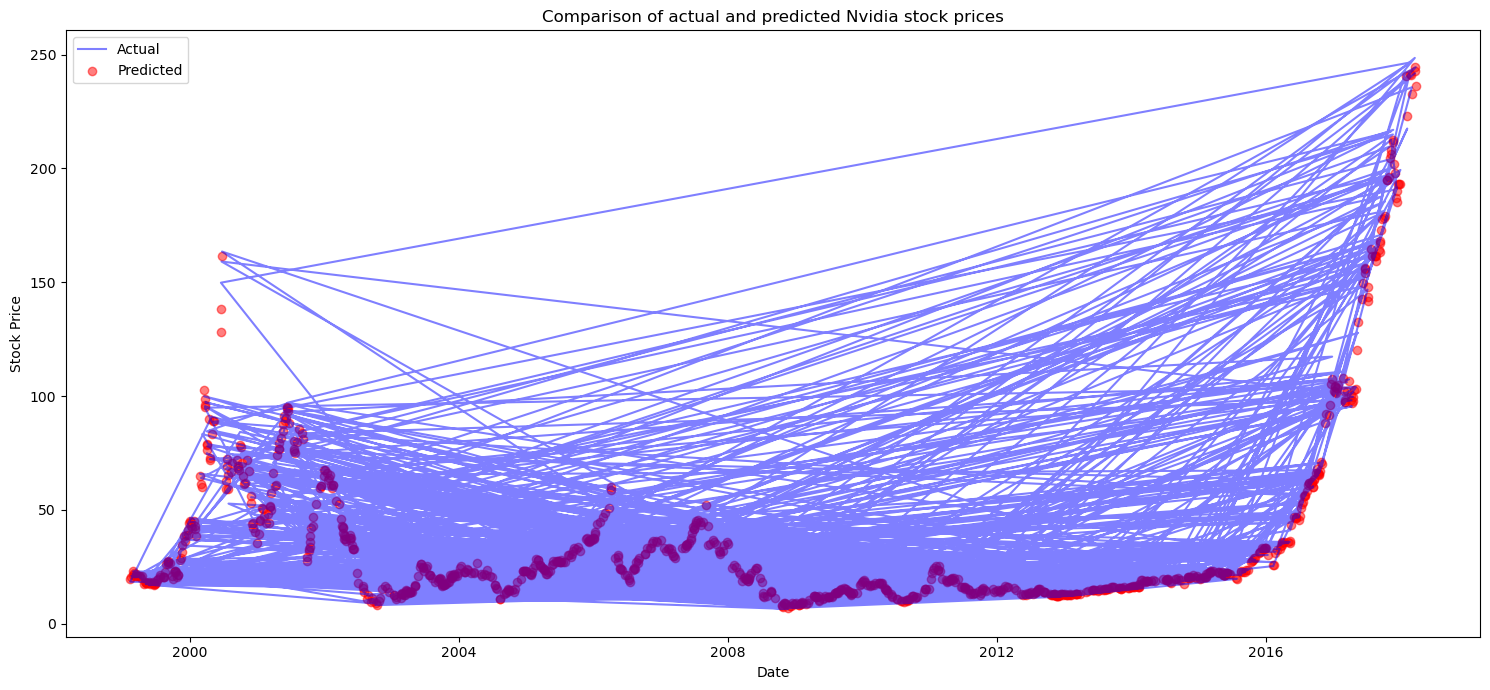

In [119]:
y_pred_series = pd.Series(y_pred, index=y_test.index)

plt.figure(figsize=(15, 7))

#plot actual values
plt.plot(y_test, label='Actual', color='blue', alpha=0.5)

#plotting predicted values as scatter plot
plt.scatter(y_pred_series.index, y_pred_series, label='Predicted', color='red', alpha=0.5)

plt.title('Comparison of actual and predicted Nvidia stock prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.tight_layout()
plt.show()


####  Model Evaluation for Interpretation of Coefficients

In [17]:
#get the coefficients from the elastic net model
coefficients = elastic_net.coef_

#create a dataframe of features and their coefficients
feature_names = X.columns
coef_df = pd.DataFrame(list(zip(feature_names, coefficients)), columns=['Feature', 'Coefficient'])

#display dataframe
print(coef_df)


            Feature  Coefficient
0             lag_1    14.148203
1             lag_2    12.509484
2  moving_average_5    13.511366


#### Final analysis and interpretation 

In [18]:
#final analysis and interpretation
print("Model Coefficients Interpretation:")

#interpret the coefficients

print("\nSummary of Model Performance:")
print("The simple Linear Regression model yielded an MSE of {:.2f}".format(mse_linear))
print("The Elastic Net model yielded an MSE of {:.2f} and an R-squared of {:.2f}".format(mse, r2))
print("This suggests that the regularization in the Elastic Net model [provide interpretation based on whether the MSE improved or not].")
print("Features with the most influence on the model predictions are [list the features with the largest coefficients].")


Model Coefficients Interpretation:

Summary of Model Performance:
The simple Linear Regression model yielded an MSE of 3.43
The Elastic Net model yielded an MSE of 5.63 and an R-squared of 1.00
This suggests that the regularization in the Elastic Net model [provide interpretation based on whether the MSE improved or not].
Features with the most influence on the model predictions are [list the features with the largest coefficients].


#### Model Performance Analysis:

When looking at our Elastic Net model, we obtained an MSE of 5.63 and an R-squared of 1.00 on the test data. While the MSE suggests the model's predictions are reasonably close to the actual values, the perfect R-squared score is uncommon in practice and could indicate overfitting or data leakage.



### References


Kim, W. (2024, March 7). How Nvidia beat everyone else in the AI race. Vox. https://www.vox.com/money/2024/3/7/24092309/nvidia-stock-earnings-valuation-ai-explainer

Vallarino, D. (2024). The Rise and Fall of Nvidia’s Stock Price: A macro and microeconomic issue. Www.linkedin.com. https://www.linkedin.com/pulse/rise-fall-nvidias-stock-price-macro-microeconomic-diego-nohuf/